<a href="https://colab.research.google.com/github/harishjungshahi/Deep-Learning/blob/main/CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harish Practise : CIFAR10 Classification

In [14]:
# Importing Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [15]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Data Load

In [16]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

# CIFAR -10 DATASET
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [18]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [19]:
batch_size = 100

#Data Loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Visualize a Few Images

In [20]:
for i, (images,labels) in enumerate(train_loader):
  print(images.shape)
  print(labels.shape)
  break

torch.Size([100, 3, 32, 32])
torch.Size([100])


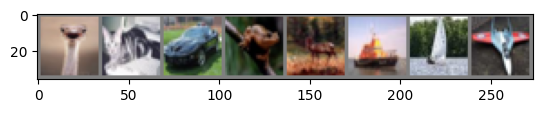

In [21]:
def imshow(img):
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

#show images
imshow(torchvision.utils.make_grid(images[:8]))

In [22]:
labels[:8]

tensor([2, 3, 1, 6, 4, 8, 8, 0])

In [23]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [24]:
[classes[i] for i in labels[:8]]

['bird', 'cat', 'car', 'frog', 'deer', 'ship', 'ship', 'plane']

## Train a Neural Network

In [33]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(3,3), padding='same'),  # Output: (32, 32, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),        # Output: (32, 16, 16)

            nn.Conv2d(32, 64, kernel_size=(3,3)),             # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))         # Output: (64, 7, 7)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                # Flatten to (64 * 7 * 7 = 3136)
            nn.Linear(64 * 7 * 7, 600),                  # Corrected input size
            nn.ReLU(),
            nn.Linear(600, 120),
            nn.ReLU(),
            nn.Linear(120, 10)
        )

    def forward(self, x):
        x = self.network(x)
        x = self.fc_layers(x)
        return x

In [34]:
model = CNN()
dummy_input = torch.randn(1, 3, 32, 32)  # Single example with CIFAR-10 dimensions
output = model(dummy_input)
print("Output shape:", output.shape)  # Should be [1, 10]

Output shape: torch.Size([1, 10])


In [35]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [38]:
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

Epoch [1/10], Step [100/500], Loss: 0.0194
Epoch [1/10], Step [200/500], Loss: 0.0554
Epoch [1/10], Step [300/500], Loss: 0.0907
Epoch [1/10], Step [400/500], Loss: 0.0671
Epoch [1/10], Step [500/500], Loss: 0.0411
Epoch [2/10], Step [100/500], Loss: 0.0085
Epoch [2/10], Step [200/500], Loss: 0.0860
Epoch [2/10], Step [300/500], Loss: 0.0827
Epoch [2/10], Step [400/500], Loss: 0.0732
Epoch [2/10], Step [500/500], Loss: 0.1186
Epoch [3/10], Step [100/500], Loss: 0.0191
Epoch [3/10], Step [200/500], Loss: 0.0207
Epoch [3/10], Step [300/500], Loss: 0.0446
Epoch [3/10], Step [400/500], Loss: 0.0272
Epoch [3/10], Step [500/500], Loss: 0.0201
Epoch [4/10], Step [100/500], Loss: 0.0155
Epoch [4/10], Step [200/500], Loss: 0.0485
Epoch [4/10], Step [300/500], Loss: 0.0657
Epoch [4/10], Step [400/500], Loss: 0.0497
Epoch [4/10], Step [500/500], Loss: 0.1404
Epoch [5/10], Step [100/500], Loss: 0.0308
Epoch [5/10], Step [200/500], Loss: 0.1108
Epoch [5/10], Step [300/500], Loss: 0.0662
Epoch [5/10